# Statistic for AI and Data Science 
# Coursework 2 (Version 1)

## Aim of the analysis:

* How well the proposed variables can predict the bridge condition. 
* Which of the proposed variables has more influence on the current condition.


Predictor variables (variables to predict the current condition of bridges):
1. Age (derived from variable Year)
2. average use (variable AverageDaily)
3. percent trucks (variable Trucks_percent)
4. material (variable Material)
5. design (variable Design)

The target variable (current condition is derived from these variables):
1. Deck rating
2. Superstr rating
3. Substr rating.

## Section 1 Introduction
​
This notebook looks at some data from the US National Bridge Inspection maintained by the Federal Highways Agency (FHWA), part of the US Department of Transportation. The original data comes from the [National Bridge Inspection]
​

**This report will provide insights into how well the proposed variables predict the condition of bridges and which among these variables has the most significant influence on the current bridge condition**
​
### Section 1.1 The Variables
The original FHWA dataset has over 100 variables (Texas collects even more); ours is simplified. Both continuous and categorical variables are included. 
​
| Variable      |      Description             | Type | 
|:--------------|:-----------------------------|:------:|
|Structure_id   | Unique identifier of the bridge                  | String |
|District       | Highway district in Texas responsible for bridge | category | 
|Detour_Km      | Length of detour if bridge closed                | continuous |
|Toll           | Whether a toll is paid to use bridge             | category |
|Maintainer     | The authority responsible for maintenance        | category |
|Urban          | Whether the bridge is located in an urban or rural area   | category |
|Status         | The road class: interstate to local                       | category | 
|Year           | The year the bridge was built                             | continuous | 
|Lanes_on       | The number of lanes that run over the bridge              | continuous (or discrete) |
|Lanes_under    | The number of lanes that run under the bridge             | continuous (or discrete) |
|AverageDaily   | The average daily traffic (number of vehicles)            | continuous |
|Future_traffic | The estimated daily traffic in approx 20 years time       | continuous |
|Trucks_percent | The percent of traffic made up of 'trucks' (i.e. lorries) | continuous |
|Historic       | Whether the bridge is historic                            | category | 
|Service_under  | The (most important) service that runs under the bridge   | category |
|Material       | The dominant material the bridge is made from             | category |
|Design         | The design of the bridge                                  | category |
|Spans          | The number of spans the bridge has                        | category (or discrete) |
|Length         | The length of the bridge in metres                        | continuous |
|Width          | The width of the bridge in metres                         | continuous |
|Rated_load     | The rated max loading of bridge (in tonnes)               | continuous |
|Scour_rating   | Only for bridges over water: the 'scour' condition        | ordinal |
|Deck_rating    | The condition of the deck of the bridge                   | ordinal |
|Superstr_rating| The condition of the bridge superstructure                | ordinal |
|Substr_rating  | The condition of the bridge substructure (foundations)    | ordinal |
​
### Section 1.2 Loading the Data
​
In order to load the data from the CSV file accurately, we employ a 'type map' that specifies the data types for each variable. Without this type mapping, Pandas automatically infers data types, often representing non-numeric fields as strings. To enhance data representation, we utilize Categorical Variables. By default, the 'category' type treats each unique value as a category, without any inherent order. However, when dealing with ordinal variables, which are categorical variables with a clear order, we explicitly define an appropriate data type to maintain the necessary order.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('mode.chained_assignment', None)
%matplotlib inline

In [2]:
# The code declares a catageorical type with categories in a specified order
# This is used for an ordinal variable
rating_type = pd.CategoricalDtype(
    categories=['Failed', 'Failing', 'Critical', 'Serious', 'Poor', 'Fair', 
                'Satisfactory', 'Good', 'Very Good', 'Excellent', 'NA'], 
    ordered=True)


types_dict = { 'Structure_id': str, 'District':'category', 'Toll':'category', 
              'Maintainer':'category', 'Urban':'category', 'Status':'category', 
              'Historic':'category', 'Service_under':'category', 'Material':'category', 
              'Design':'category', 
              'Deck_rating':rating_type, 'Superstr_rating':rating_type, 'Substr_rating':rating_type, 
              }

bridges = pd.read_csv('tx19_bridges_sample.csv', dtype = types_dict, index_col = 'Structure_id')
bridges

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,3,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,1,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,4,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500


## Section 2 Data Preparation

In this section, we focus on the examination and preparation of predictor variables for the construction of a regression model. 

* Our primary interest lies in determining the age of bridges. To calculate the 'Age' variable, we subtract the year of construction from the current year (2023). This helps us understand how old each bridge is.
* It's important to address outliers, which are data points that significantly deviate from the norm. Outliers can introduce unnecessary variability to our data, which can negatively impact the results of our regression analysis. Thus, we visualize the distributions of predictor variables and take steps to remove very old bridges and outliers.
* Both the 'Design' and 'Material' variables have a large number of categories. To simplify our analysis, it's advisable to merge very small categories into more manageable groups.
* The current condition of bridges is evaluated based on three ratings, each providing insight into the bridge's overall condition.

#### 2.1 Deriving Age in years variable from Year variable

In [3]:
present_year = pd.Timestamp.now().year
bridges['Age'] = present_year - bridges['Year']
bridges  # 'Age' variable is added to data

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,Age
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1,18
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1,18
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150,11
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120,73
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600,29
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600,23
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500,27


#### 2.2 Excluding Historic bridges and outliers in predictor variables

Text(0.5, 1.0, 'Age Distribution')

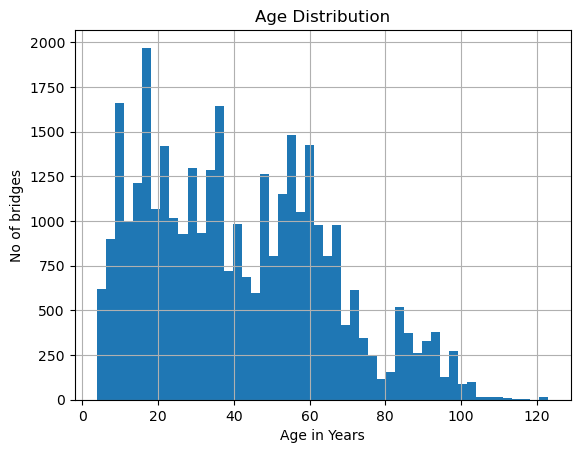

In [4]:
# Examining Age distribution
_ax = bridges['Age'].hist(bins=50)
plt.xlabel('Age in Years')
plt.ylabel('No of bridges')
plt.title('Age Distribution')

In order to classify a bridge as historic, it must meet two criteria: it should be at least 50 years old, and it should either be listed on or eligible for inclusion in the National Register, as specified by the National Trust USA. As mentioned earlier, the typical lifespan of bridges falls within the range of 50 to 75 years. Consequently, in the subsequent step, we will exclude bridges that are over 75 years old from our analysis.

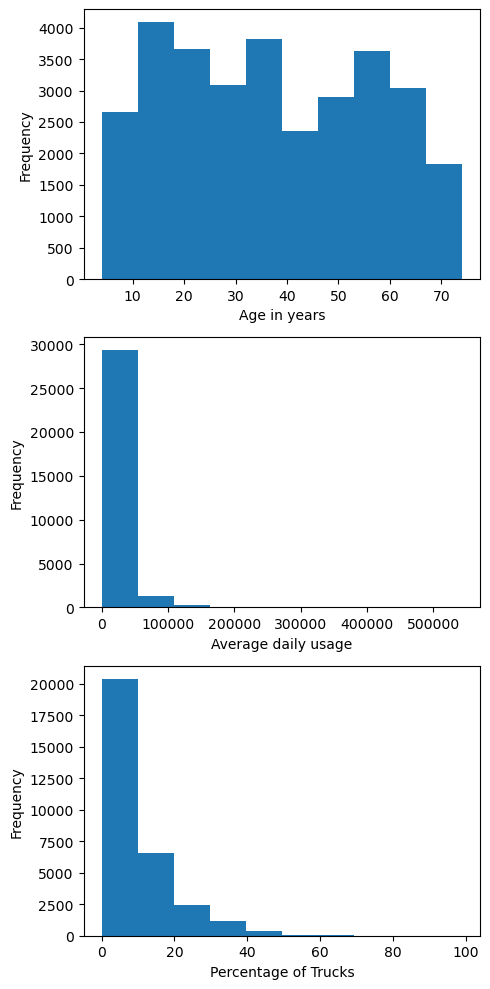

In [5]:
# Removing Historic bridges
bridges = bridges[bridges.Age < 75]

import matplotlib.pyplot as plt

# subplots to show distritions of predictor variables
fig, axes = plt.subplots(3, 1, figsize=(5, 10))

# histograms for each variable
bridges['Age'].plot(kind='hist', bins=10, ax=axes[0])
bridges['AverageDaily'].plot(kind='hist', bins=10, ax=axes[1])
bridges['Trucks_percent'].plot(kind='hist', bins=10, ax=axes[2])

# labels for each subplot
axes[0].set_xlabel('Age in years')
axes[1].set_xlabel('Average daily usage')
axes[2].set_xlabel('Percentage of Trucks')


plt.tight_layout()

plt.show()


* The graphs above depict the distributions of continuous predictor variables. Notably, the distributions of 'Truck percent' and 'Average Daily' exhibit a significant right skew, indicating an uneven distribution of data. Such skewness may suggest the presence of outliers in 'Average Daily' and 'Truck percent,' which could introduce unnecessary noise into our analysis. While the 'Age' variable demonstrates a more balanced distribution and historic old bridges have already been excluded from the dataset, there is still the possibility of outliers in this variable. As we will identify and remove any outliers from the data to ensure its integrity and reliability for further analysis.


* Outliers have the potential to introduce excessive variability into your dataset, which, in turn, can diminish the reliability of regression results. Removing outliers can enhance the statistical significance of your findings. 

* To identify outliers in the continuous predictor variables, we will employ the Interquartile Range (IQR) method in the upcoming analysis.

* The IQR is a measure of data dispersion, signifying how data points are spread. In this method, data points falling outside the calculated IQR are considered outliers.


In [6]:
bridges[['AverageDaily','Trucks_percent', 'Age']].describe()

#the fact the mean is so small compared to the max value indicates the max value is an outlier for AverageDaily and Trucks_percent 
#this strongly indicates the presence of an outlier

,AverageDaily,Trucks_percent,Age
count,31070.000000,31070.000000,31070.000000
mean,12347.354554,8.338140,36.661088
std,25166.942946,10.293785,19.280606
min,0.000000,0.000000,4.000000
25%,340.000000,0.000000,19.000000
50%,3550.500000,5.000000,35.000000
75%,12700.000000,12.000000,54.000000
max,543000.000000,99.000000,74.000000


In [7]:
#function to find outliers using Interquartile range method

def outliers(value):
    q1 = value.quantile(0.25)
    q3 = value.quantile(0.75)
    IQR = q3 - q1
    outliers = value[((value < (q1-1.5 * IQR)) | (value > (q3 + 1.5 *IQR)))]    
    return outliers


outliers_a= outliers(bridges['AverageDaily'])         
outliers_b = outliers(bridges['Age'])
outliers_c = outliers(bridges['Trucks_percent'])

print('outliers in AverageDialy :' , len(outliers_a))
print('outliers in Age :' , len(outliers_b))
print('outliers in Trucks_percent :' , len(outliers_c))

outliers in AverageDialy : 3084
outliers in Age : 0
outliers in Trucks_percent : 1522


In [8]:
#Removing Average Daily ouliers  
q1 = bridges['AverageDaily'].quantile(0.25)
q3 = bridges['AverageDaily'].quantile(0.75)
IQR = q3 - q1
bridges = bridges[~((bridges['AverageDaily'] < (q1 - 1.5 * IQR)) | (bridges['AverageDaily'] > (q3 + 1.5 *IQR)))]
bridges



,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,Age
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1,18
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1,18
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150,11
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120,73
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600,29
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600,23
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500,27


In [9]:
#Removing Trucks_percent outliers 
q1 = bridges['Trucks_percent'].quantile(0.25)
q3 = bridges['Trucks_percent'].quantile(0.75)
IQR = q3 - q1
bridges = bridges[~((bridges['Trucks_percent'] < (q1 - 1.5 * IQR)) | (bridges['Trucks_percent'] > (q3 + 1.5 *IQR)))]
bridges

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,Age
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1,18
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1,18
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150,11
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120,73
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000004,District9,5,Free,Military,Urban,Local,1991,2,0,800,...,32.2,9.1,Good,Good,Good,15.6,25.0,Dry,1000,32
DAPFORHOO000006,District9,114,Free,Military,Urban,Local,1950,2,0,150,...,18.4,5.7,Satisfactory,Good,Satisfactory,26.1,10.0,Unstable,300,73
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500,27


#### 2.3 Reducing the number of categories of materials and design

In [10]:
Material_counts = bridges.Material.value_counts()
print(Material_counts)
# Concrete, Steel and Timber are counted most. Small categories such as 'Other'and Masonry will be labeled as 'Others'.
# Merging small categories in Material variable
bridges.Material = bridges['Material'].replace([ 'Other', 'Masonry'], 'Others')
bridges.Material.value_counts()


Concrete    21341
Steel        4975
Timber        443
Other          39
Masonry         1
Name: Material, dtype: int64


Concrete    21341
Steel        4975
Timber        443
Others         40
Name: Material, dtype: int64

In [11]:
Design_counts = bridges.Design.value_counts()
print(Design_counts)
# Beam', 'Slab' and 'Other' categories are major categories over large counts. 
# we will reduce the number of categories into 'Arch', 'Frame', 'Truss', 'Movable', and Suspension are added to 'Others
bridges.Design = bridges.Design.replace(['Arch', 'Frame', 'Other', 'Truss', 'Movable', 'Suspension'], 'Others')
bridges.Design.value_counts()

Beam          22500
Slab           2926
Other          1183
Arch             97
Frame            54
Truss            26
Movable          11
Suspension        2
Name: Design, dtype: int64


Beam      22500
Slab       2926
Others     1373
Name: Design, dtype: int64

#### 2.4 Current condition

Deriving the current condition of the bridges by combining three key condition variables: Superstructure rating, Deck rating, and Substructure rating. These variables have ordinal values, and our task is to convert them into numerical values as follows:

'Excellent' is represented as 9
'Very Good' is represented as 8
'Good' is represented as 7
'Satisfactory' is represented as 6
'Fair' is represented as 5
'Poor' is represented as 4
'Serious' is represented as 3
'Critical' is represented as 2
'Failing' is represented as 1
'Failed' is represented as 0
This conversion allows us to work with these ordinal variables as numerical values in our analysis.


In [12]:
#Creating dictionary for current condition
current_condition= {'Excellent' : 9, 'Very Good': 8, 'Good' :7, 'Satisfactory' : 6,
               'Fair' : 5, 'Poor' : 4, 'Serious' : 3, 'Critical' : 2, 'Failing': 1, 'Failed': 0}
#Creating function that converts categorical values to continuous variable 
def Superstr_rating(row): 
    if row.Superstr_rating in current_condition:
        return current_condition[row.Superstr_rating]
    return row.Superstr_rating

def Deck_rating(row): 
    if row.Deck_rating in current_condition:
        return current_condition[row.Deck_rating]
    return row.Deck_rating

def Substr_rating(row):
    if row.Substr_rating in current_condition:
        return current_condition[row.Substr_rating]
    return row.Substr_rating

#Applying function on each variables
Superstr_rating = bridges.apply(Superstr_rating, axis = 1)
Deck_rating = bridges.apply(Deck_rating, axis = 1)
Substr_rating = bridges.apply(Substr_rating, axis = 1)

#Creating new variable Current condition
bridges = bridges.assign(Current_condition = Superstr_rating + Deck_rating + Substr_rating)
bridges

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,Age,Current_condition
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1,18,23.0
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,4.3,Good,Good,Very Good,41.7,0.0,Dry,1,18,22.0
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150,11,24.0
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,3.7,Good,Good,Poor,10.0,0.0,Dry,120,73,18.0
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200,19,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000004,District9,5,Free,Military,Urban,Local,1991,2,0,800,...,9.1,Good,Good,Good,15.6,25.0,Dry,1000,32,21.0
DAPFORHOO000006,District9,114,Free,Military,Urban,Local,1950,2,0,150,...,5.7,Satisfactory,Good,Satisfactory,26.1,10.0,Unstable,300,73,19.0
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,9.8,Good,Good,Good,24.5,25.0,No waterway,1500,27,21.0


In [13]:
bridges = bridges[[ 'AverageDaily', 'Trucks_percent','Age', 'Material', 'Design', 'Current_condition']]
bridges
#bridges dataframe contains 'Predictors' and 'Target'


,AverageDaily,Trucks_percent,Age,Material,Design,Current_condition
Structure_id,,,,,,
000021521-00101,1,0.0,18,Concrete,Slab,23.0
000021521-00181,1,0.0,18,Concrete,Slab,22.0
000021521-TMP20,100,0.0,11,Concrete,Beam,24.0
000021525-00012,80,0.0,73,Timber,Beam,18.0
000021580-00092,150,4.0,19,Concrete,Beam,23.0
...,...,...,...,...,...,...
DAPFORHOO000004,800,25.0,32,Concrete,Beam,21.0
DAPFORHOO000006,150,10.0,73,Steel,Beam,19.0
DAPFORHOO000015,1200,25.0,27,Concrete,Beam,21.0


**Dataset is prepared the five predictor variables 'Age', 'AverageDaily', 'Trucks_percent', 'Material', 'Design'  and the target 
variable 'Current_condition' . dataset is prepared to draw the relationship between the predictors and to give preliminary conclusions**

## Section 3 Exploratory Analysis

Relationship between all variables like, Overview correlations, Relationship between predictor variables and target variable, Relationship between predictor variables, Relationship between categorical variables are analysed and explained in this section


In [14]:
bridges

##Dataset is prepared the five predictor variables 'Age', 'AverageDaily', 'Trucks_percent', 'Material', 'Design' and the target variable 'Current_condition' 
## \dataset is prepared to draw the relationship between the predictors and to give preliminary conclusions**

,AverageDaily,Trucks_percent,Age,Material,Design,Current_condition
Structure_id,,,,,,
000021521-00101,1,0.0,18,Concrete,Slab,23.0
000021521-00181,1,0.0,18,Concrete,Slab,22.0
000021521-TMP20,100,0.0,11,Concrete,Beam,24.0
000021525-00012,80,0.0,73,Timber,Beam,18.0
000021580-00092,150,4.0,19,Concrete,Beam,23.0
...,...,...,...,...,...,...
DAPFORHOO000004,800,25.0,32,Concrete,Beam,21.0
DAPFORHOO000006,150,10.0,73,Steel,Beam,19.0
DAPFORHOO000015,1200,25.0,27,Concrete,Beam,21.0


#### 3.1 correlations

C:\Users\aashi\AppData\Local\Temp\ipykernel_5388\1581052209.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bridges.corr()


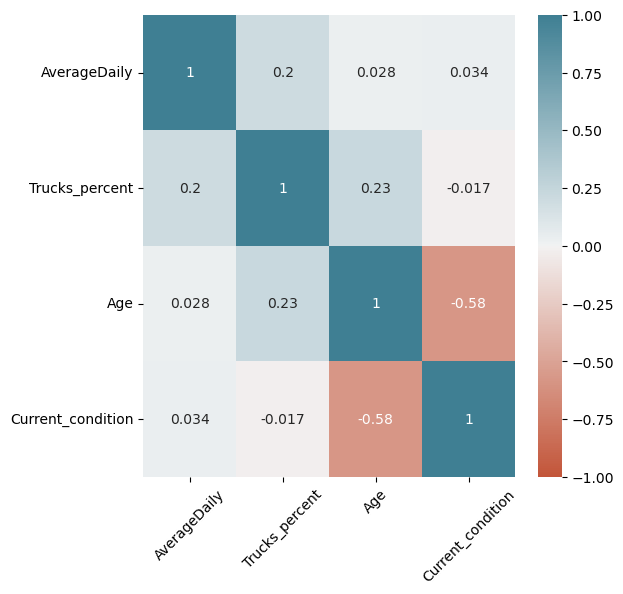

In [15]:
# Create a correlation heatmap
correlation_matrix = bridges.corr()

# Set up the heatmap
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True),
            annot=True, ax=ax, annot_kws={"size": 10})

# Adjust y-axis and x-axis labels
_y = plt.yticks(rotation=0, fontsize=10)
_x = plt.xticks(rotation=45, fontsize=10)


The heatmap displayed above provides insights into the relationships between **continuous predictor variables and the current condition of the bridges**. 

Values close to +1 or -1 indicate a strong relationship between variables.A value of 0 suggests no significant relationship between variables.Based on the heatmap, we observe the following relationships:

The variable 'Age' exhibits a moderate negative correlation with a coefficient of -0.58, indicating that as the age of the bridges increases, the current condition tends to decrease.

On the other hand, 'Average Daily' and 'Trucks percent' show very weak correlations with the current condition, with coefficients of 0.034 and -0.017, respectively. These correlations suggest that changes in 'Average Daily' and 'Trucks percent' have only a minor impact on the current condition of the bridges.

In summary, 'Age' is the continuous predictor variable that demonstrates the most noticeable relationship with the current condition, while 'Average Daily' and 'Trucks percent' have relatively weaker correlations.

#### 3.2 Relationship between predictor variables and target variable 

To simplify the visualization and reduce data density in the scatter plots, we can either opt for hexbin plots or work with a subset of the data, specifically the top 1% of bridges, to better observe the relationships between variables.

<Axes: xlabel='AverageDaily', ylabel='Current_condition'>

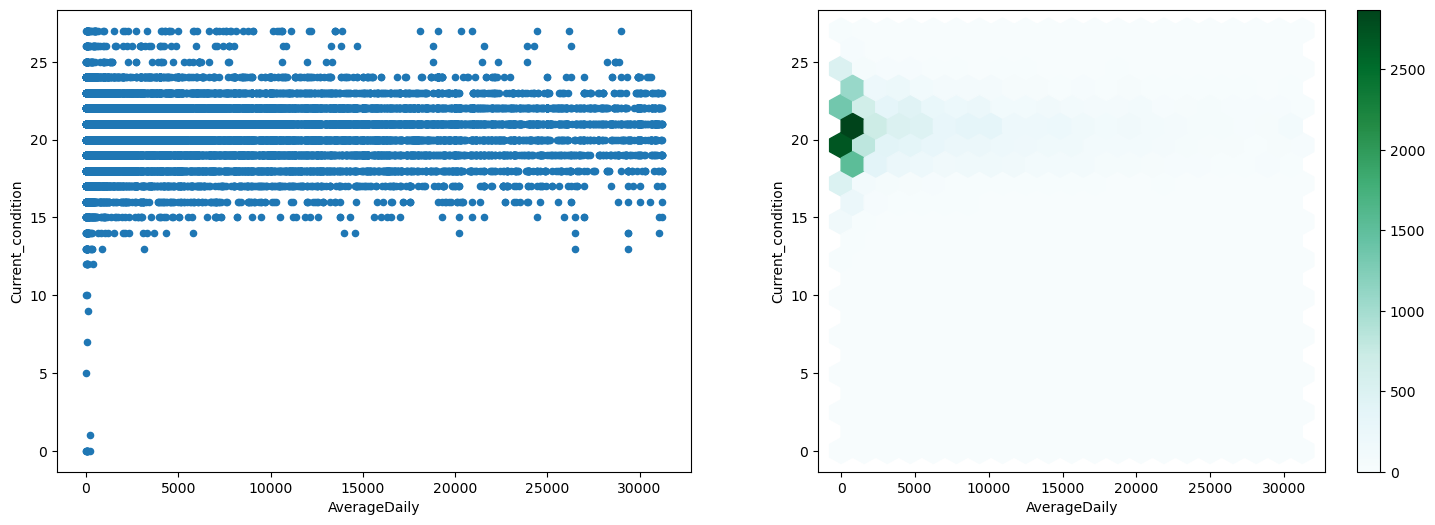

In [16]:
# Visualizing the relationship between Average uses and Current condition
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
bridges.plot.scatter(x='AverageDaily', y='Current_condition', ax=ax1)
bridges.plot.hexbin(x='AverageDaily', y='Current_condition', gridsize=20, sharex=False, ax=ax2)



The visual representations above illustrate the relationship between 'AverageDaily' and 'Current Condition.' In the scatter plot, it's evident that there is hardly any visually discernible relationship. However, within the range of 0 to 5000 average daily uses, there appears to be a slight connection, where the current condition consistently falls within the 'good' range of 15 to 25.

Furthermore, in the hexbin plot, the darker green areas, indicating higher frequency, correspond to a combination of a relatively small number of average uses and a good current condition. This suggests that these specific conditions are more prevalent within the dataset.

<Axes: xlabel='Age', ylabel='Current_condition'>

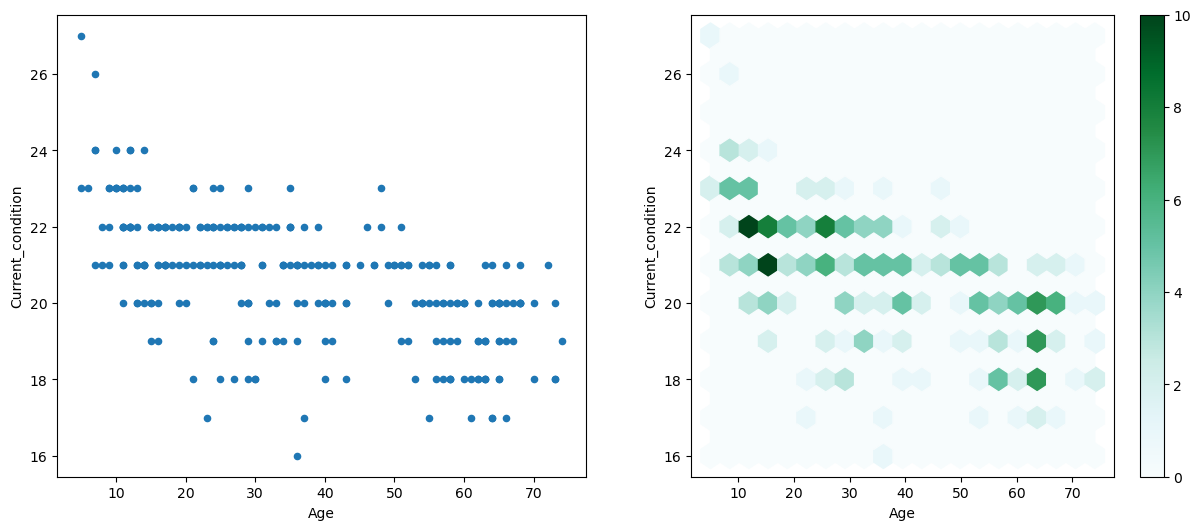

In [17]:
# Visualizing the relationship between Age and Current condition
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sampled_bridges = bridges.sample(frac=0.01)
sampled_bridges.plot.scatter(x='Age', y='Current_condition', ax=ax1)
sampled_bridges.plot.hexbin(x='Age', y='Current_condition', gridsize=20, sharex=False, ax=ax2)


The visual representations above depict the relationship between 'Age' and 'Current Condition.' In the scatter plot concerning the 'Age' variable and the Current condition score, it's evident that there exists a strong negative relationship. In simpler terms, as bridges age, their current condition scores tend to decrease. This same relationship is apparent in the second plot. To summarize, it's apparent that older bridges generally exhibit poorer current condition scores.

<Axes: xlabel='Trucks_percent', ylabel='Current_condition'>

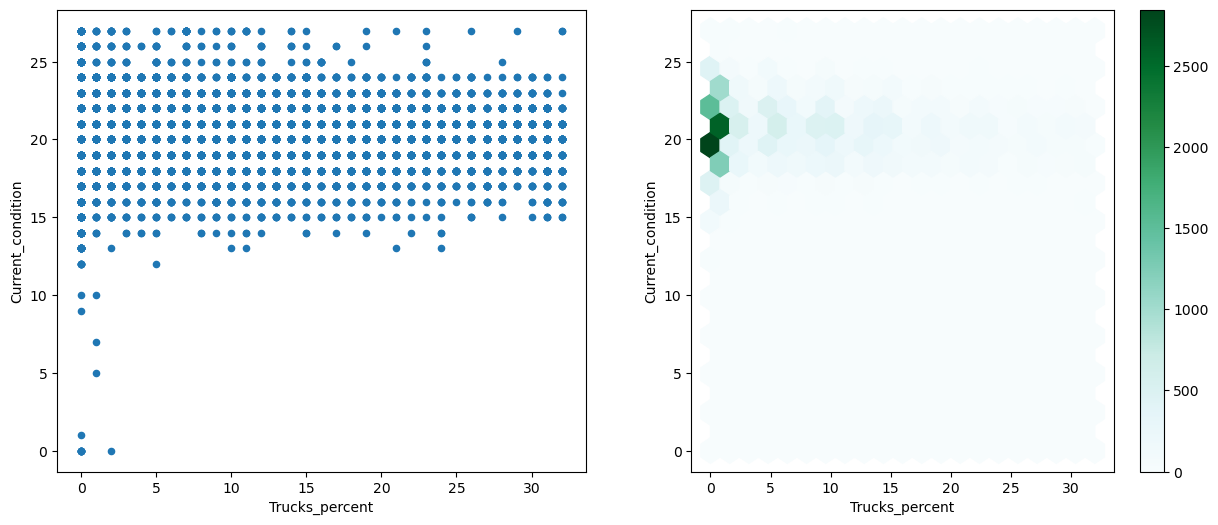

In [18]:
# Visualizing the relationship between Trucks percent and Current condition
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
bridges.plot.scatter(x='Trucks_percent', y='Current_condition', ax=ax1)
bridges.plot.hexbin(x='Trucks_percent', y='Current_condition', gridsize=20, sharex=False, ax=ax2)


The scatter plot of 'Trucks_percent' and 'Current Condition' doesn't reveal a strong relationship, much like the 'Age' and 'Current condition' plot. However, when 'Trucks_percent' is low, the current condition score typically falls between 15 and 25. As 'Trucks_percent' increases, the score tends to shift towards the lower end of the range, suggesting a weak negative correlation. In summary, bridges with fewer trucks are generally in better condition.

<Axes: xlabel='Design', ylabel='Current_condition'>

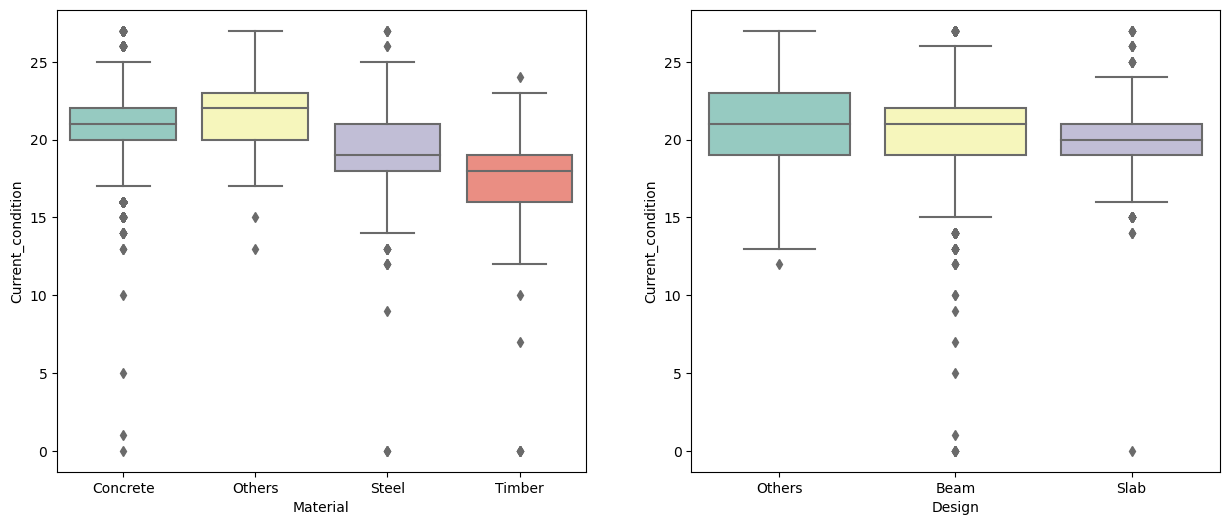

In [19]:
# Visualizing the relationship between Categorical variables and Current condition 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot between Current condition and Material
sns.boxplot(x='Material', y='Current_condition', data=bridges, palette='Set3', ax=ax1)

# Boxplot between Current condition and Design
sns.boxplot(x='Design', y='Current_condition', data=bridges, palette='Set3', ax=ax2)


The first boxplot, depicting the relationship between 'Material' and the 'Current condition' score, reveals that bridges constructed from concrete and other materials tend to have good conditions with average scores above 21 and 22, respectively (as indicated by the line dividing the box). In contrast, bridges made of timber and steel materials exhibit lower current condition scores in comparison to those made from concrete and other materials. Although timber and steel bridges have lower scores when compared to concrete and other bridges, their current conditions are spread across a range from 14 to 20 for timber and roughly 16 to 23 for steel. In summary, it's evident that timber and steel bridges generally experience worse conditions than concrete and other material bridges, indicating that the choice of material does indeed impact the condition of the bridges.

The second boxplot demonstrates the connection between bridge design and the current condition score. Bridges with an 'Others' design exhibit a wide range of scores, spanning from a minimum of 14 to a maximum of 26, reflecting their diverse designs. Beam bridges tend to have current condition scores between 15 and 26, while Slab bridges typically fall within the range of 16 to 24. In general, there is a minimal relationship between bridge designs and current conditions, as the average values are nearly identical for Beam and Others.



#### 3.3 Relationship between Predictor variables

<Axes: xlabel='Trucks_percent', ylabel='AverageDaily'>

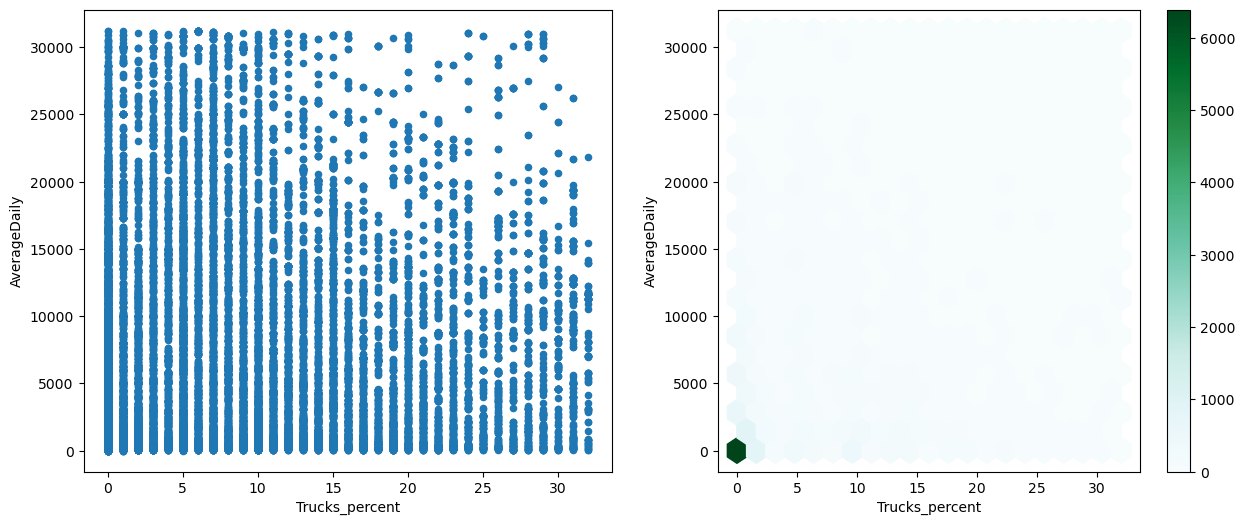

In [20]:
# Visualizing the relationship between Trucks percent and Average Daily
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
bridges.plot.scatter(x='Trucks_percent', y='AverageDaily', ax=ax1)
bridges.plot.hexbin(x='Trucks_percent', y='AverageDaily', gridsize=20, sharex=False, ax=ax2)


Both the scatter plot and hexbin plot visually indicate that there is no apparent relationship between 'AverageDaily' and 'Trucks_percent.' The data points are dispersed across the graphs, making it difficult to discern any meaningful correlation between these variables.

<Axes: xlabel='Age', ylabel='AverageDaily'>

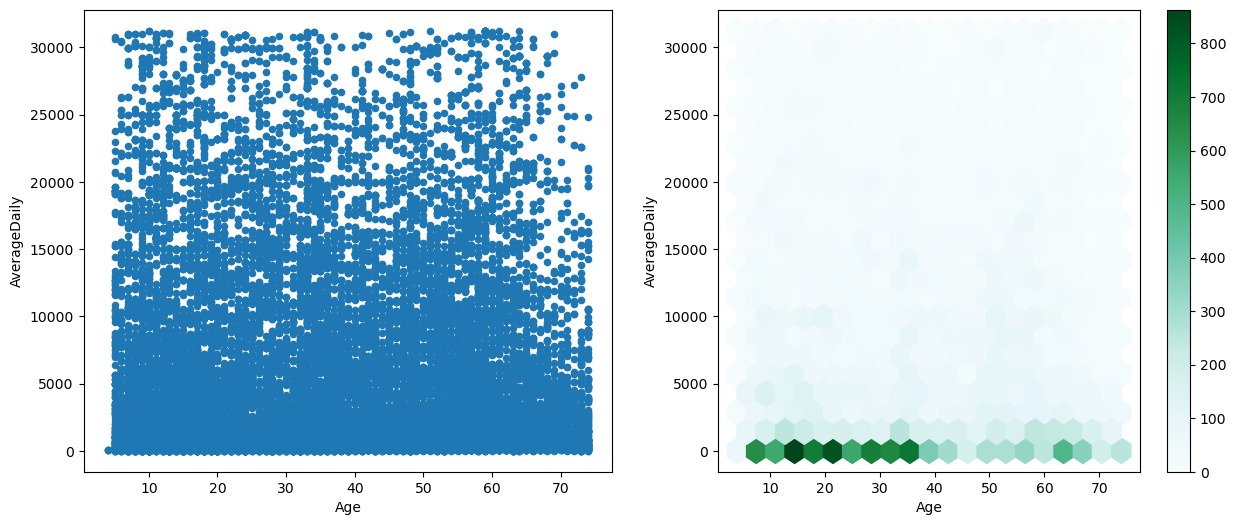

In [21]:
# Visualizing the relationship between Age and AverageDaily
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
bridges.plot.scatter(x='Age', y='AverageDaily', ax=ax1)
bridges.plot.hexbin(x='Age', y='AverageDaily', gridsize=20, sharex=False, ax=ax2)


Both the scatter plot and hexbin plot visually indicate that there is no apparent relationship between 'AverageDaily' and 'Age.' The data points are dispersed across the graphs, making it difficult to discern any meaningful correlation between these variables.

<Axes: xlabel='Age', ylabel='Trucks_percent'>

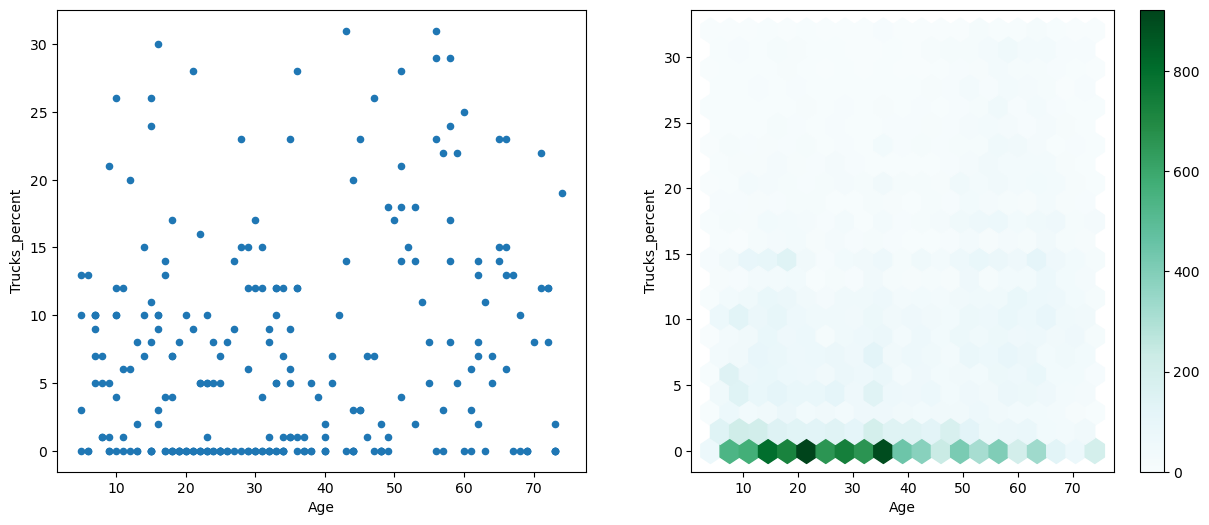

In [22]:
# Visualizing the relationship between Age and Trucks_percent
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sampled_bridges = bridges.sample(frac=0.01)
sampled_bridges.plot.scatter(x='Age', y='Trucks_percent', ax=ax1)
bridges.plot.hexbin(x='Age', y='Trucks_percent', gridsize=20, sharex=False, ax=ax2)


No relationship between Age and Trucks percent visually.

[None]

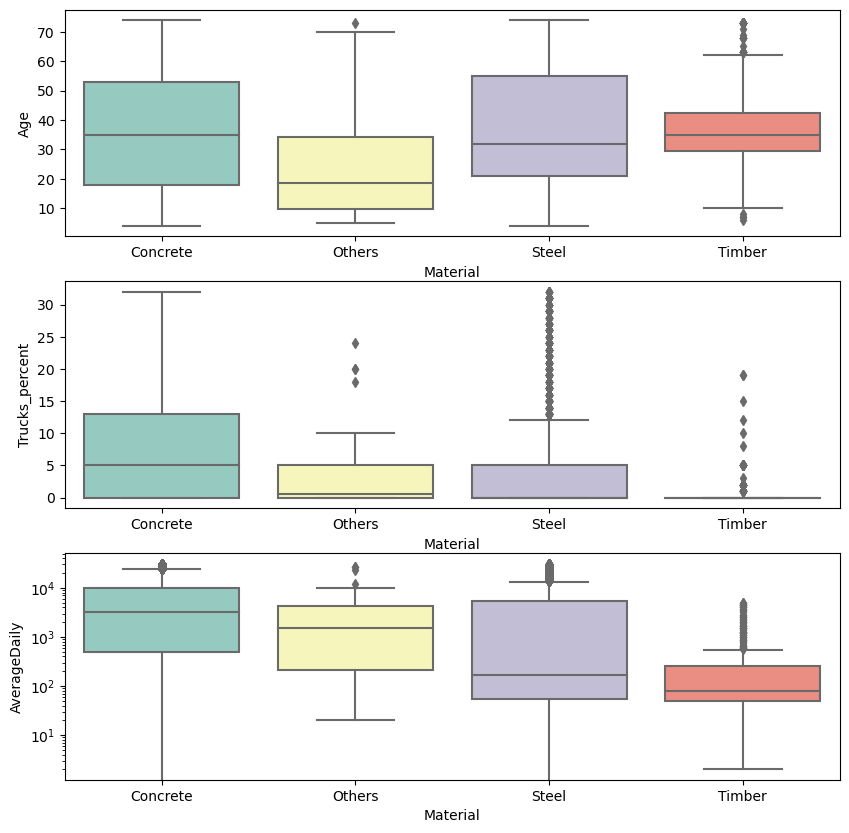

In [23]:
# Visualizing the relationship between Material and Continuous variables with a different palette
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

sns.boxplot(x='Material', y='Age', data=bridges, palette='Set3', ax=ax1)
sns.boxplot(x='Material', y='Trucks_percent', data=bridges, palette='Set3', ax=ax2)
sns.boxplot(x='Material', y='AverageDaily', data=bridges, palette='Set3', ax=ax3)
ax3.set(yscale='log')



These boxplot graphs depict the relationship between 'Material' and continuous variables.

In the first boxplot, it is evident that Timber bridges and bridges constructed with 'Other materials' tend to be younger compared to Concrete and Steel bridges. The age ranges vary, with Concrete bridges typically falling between 18 to 50 years, having an average age of around 30 years. In contrast, Steel bridges range from approximately 20 to 50 years, with an average age of about 28 years. Timber bridges span from roughly 28 to 35 years, with an average age of 30 years, while 'Other material' bridges typically range from 10 to 30 years, having an average age of 18 years. This illustrates that bridges made of 'Other materials' are generally younger than those constructed with Concrete, Steel, and Timber.

In the second boxplot, Concrete bridges stand out as having a higher percentage of trucks compared to Timber, Steel, and 'Other material' bridges. Timber bridges show no trucks percentage, indicating a lack of truck traffic without accounting for outliers. Concrete bridges have the highest percentage of trucks compared to other bridge types.

The third boxplot reveals the relationship between bridge average daily usage and bridge material. Concrete bridges exhibit high average daily usage, exceeding 1000, while Timber and Steel bridges have the lowest average daily usage, averaging around 100. Bridges constructed with 'Other materials' have slightly lower average daily usage compared to Concrete bridges.


[None]

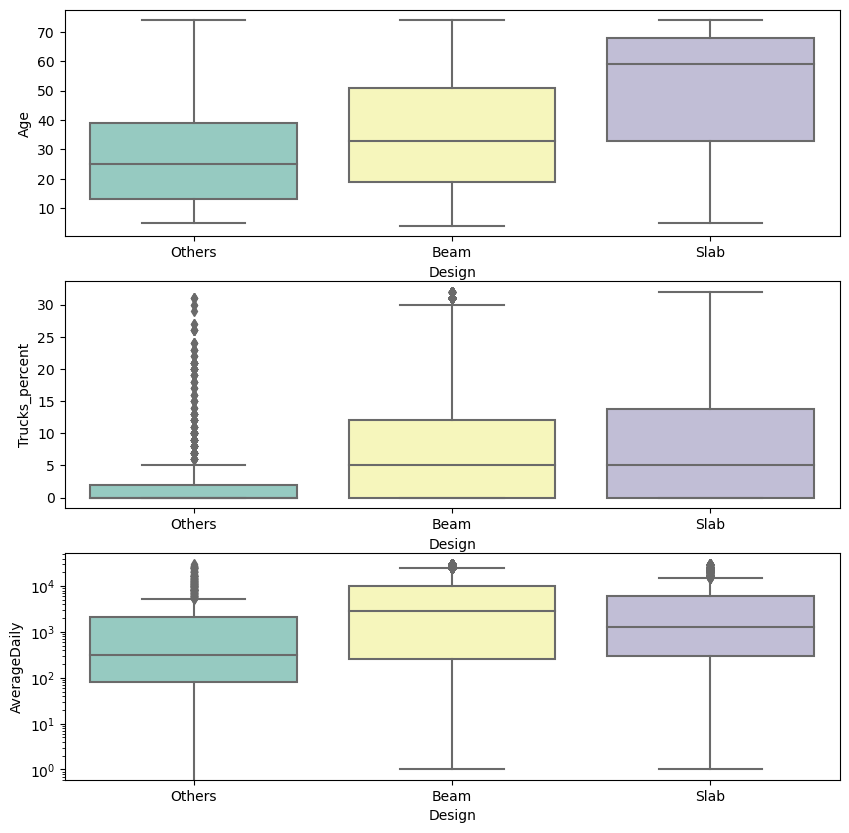

In [24]:
# Visualizing the relationship between Design and Continuous variables with a different palette
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

sns.boxplot(x='Design', y='Age', data=bridges, palette='Set3', ax=ax1)
sns.boxplot(x='Design', y='Trucks_percent', data=bridges, palette='Set3', ax=ax2)
sns.boxplot(x='Design', y='AverageDaily', data=bridges, palette='Set3', ax=ax3)
ax3.set(yscale='log')


hese boxplot graphs provide insight into the relationship between 'Design' and continuous variables.

In the first boxplot, it's apparent that bridges with a 'Slab' design tend to be older compared to 'Other' designed bridges and 'Beam' bridges. The age ranges vary, with Slab bridges typically falling within the range of 20 to 60 years. Beam bridges range from approximately 20 to 45 years, and 'Other design' bridges span from 10 to 36 years. In summary, Slab bridges are generally the oldest, followed by Beam bridges and 'Other' designed bridges.

In the second boxplot, it becomes evident that 'Other design' bridges have a lower trucks percentage compared to Slab bridges and Beam bridges. 'Others' designed bridges have an average trucks percentage that is nearly zero. In contrast, Slab and Beam bridges exhibit higher trucks percentages compared to 'Other design' bridges.

The third boxplot illustrates the relationship between bridge average daily usage and bridge design. Beam bridges have the highest average daily usage, averaging around 1000, exceeding that of Slab bridges and 'Other design' bridges. On the whole, 'Other design' bridges tend to have lower average daily usage in comparison to Beam and Slab bridges.

#### 3.4 Relationship between Material and Design variables


visualizations that illustrate the relationship between 'Material' and 'Design' based on conditional probability distributions. For example, we'll examine the probability of a bridge having a 'Beam' design, given that it is made of concrete.

Text(0.5, 1.0, 'Probability of Design, given Material')

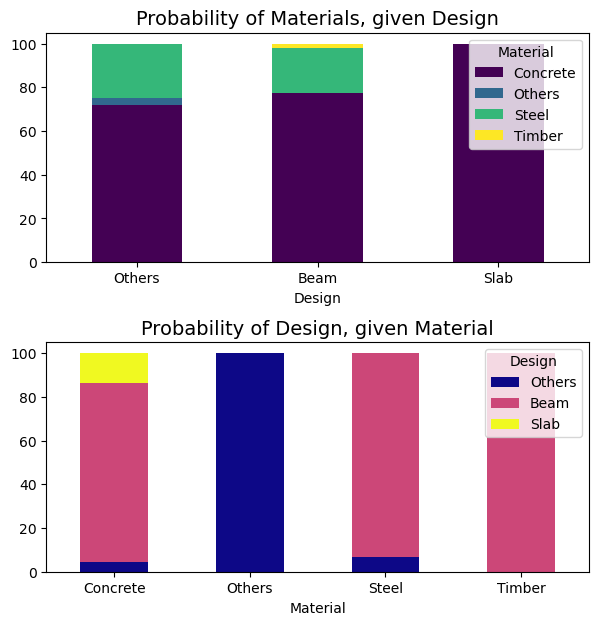

In [25]:
# Conditional probability Design and Material
mat_given_des = pd.crosstab(bridges.Design, [bridges.Material], normalize='index')
des_given_mat = pd.crosstab(bridges.Material, [bridges.Design], normalize='index')

# Display as percentages
c = mat_given_des.round(4) * 100
d = des_given_mat.round(4) * 100

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7), sharey=False, sharex=False)
fig.subplots_adjust(hspace=0.35)

# Visualizing Conditional Probability of Materials, given Design with different colors
c.plot(kind='bar', subplots=False, ax=ax1, rot=0, stacked=True, colormap='viridis')
ax1.set_title('Probability of Materials, given Design', fontsize=14)

# Visualizing Conditional Probability of Design, given Material with different colors
d.plot(kind='bar', subplots=False, ax=ax2, rot=0, stacked=True, colormap='plasma')
ax2.set_title('Probability of Design, given Material', fontsize=14)


The above graphs provide insights into the relationship between 'Material' and 'Design' variables. In the first bar chart, we observe the Probability of Materials given Design. It's noteworthy that approximately 80% of Beam bridges are primarily constructed from concrete. Additionally, approximately 70% of bridges with 'Others' designs are made of concrete, and 23% of 'Others' designed bridges are constructed with steel. Notably, all Slab-designed bridges are constructed using concrete.

The second bar chart, illustrating the Probability of Design given Material, reveals that roughly 80% of Concrete bridges predominantly feature a beam design, while approximately 10% of Concrete bridges exhibit a slab design. 'Others' bridges encompass various design types, with no clear predominance. Steel bridges primarily favor a beam design, and Timber bridges are exclusively associated with a 100% beam design.

In summary, it is evident that the majority of bridges are constructed from concrete and predominantly feature a beam design

**How well the proposed variables can predict the bridge condition**
Given the limited correlations between design variables, trucks percent, average usage, and current condition scores, it appears that the prediction of a bridge's current condition may not be significantly explained by these three predictor variables. Consequently, the prediction model is likely to be predominantly influenced by the 'Age' variable.

**Which of the proposed variables has more influence on the current condition**
As previously mentioned, there is a strong negative relationship between Age and the current condition of bridges, indicating that older bridges tend to be in worse condition. Additionally, there is a relationship between Material and the current condition. For instance, bridges made of concrete and 'others' materials are typically in good condition. Therefore, when it comes to predicting the current condition of bridges, Age and Material are likely to have the most significant impact.


## Section 4 Regression Modelling

In this section, we build a linear regression model using five predictor variables to predict the target variable. Among the predictor variables, two are categorical in nature and cannot be directly included in the regression model. To incorporate these categorical predictors, we need to transform them into numeric variables using reference encoding

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
pd.set_option('mode.chained_assignment', None)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [27]:
Design_d = pd.get_dummies(bridges.Design, drop_first = True)
Material_d = pd.get_dummies(bridges.Material, drop_first = True)
print(Design_d)
print(Material_d)

                 Beam  Slab
Structure_id               
000021521-00101     0     1
000021521-00181     0     1
000021521-TMP20     1     0
000021525-00012     1     0
000021580-00092     1     0
...               ...   ...
DAPFORHOO000004     1     0
DAPFORHOO000006     1     0
DAPFORHOO000015     1     0
DAPFORHOO00005A     1     0
DAPTRABLI000011     1     0

[26799 rows x 2 columns]
                 Others  Steel  Timber
Structure_id                          
000021521-00101       0      0       0
000021521-00181       0      0       0
000021521-TMP20       0      0       0
000021525-00012       0      0       1
000021580-00092       0      0       0
...                 ...    ...     ...
DAPFORHOO000004       0      0       0
DAPFORHOO000006       0      1       0
DAPFORHOO000015       0      0       0
DAPFORHOO00005A       0      0       0
DAPTRABLI000011       0      1       0

[26799 rows x 3 columns]


#### 4.2 The Regression Line Fitting


In [28]:

#Stacking converted categorical variables
design_material = np.column_stack((Design_d.Beam,Design_d.Slab, Material_d.Steel, Material_d.Others , Material_d.Timber ))

#Stacking Predictor variables and Target variable
X = np.column_stack((bridges.AverageDaily, bridges.Age, bridges.Trucks_percent, design_material))
y = bridges.Current_condition

mask = ~np.isnan(y)
X = X[mask]
y = y[mask]

#Fitting regression line
reg = LinearRegression().fit(X, y)

# Calculate R-squared
r_squared = reg.score(X, y)


print('The R2 coefficient of determination is %4.3f' % reg.score(X, y))

The R2 coefficient of determination is 0.474


The R-squared coefficient (R2) represents the percentage of variability in the dependent variable that can be accounted for by the independent variables in the regression model. In simpler terms, R2 measures how closely the data align with the regression model. An R2 value of 0.474 means that the independent variables can explain 47.4% of the variations observed in the target variable, leaving 52.6% of the variability unexplained by the model. This suggests that the model's predictive capabilities are limited, and it does not perform well in making accurate predictions.

#### 4.3 Error distribution

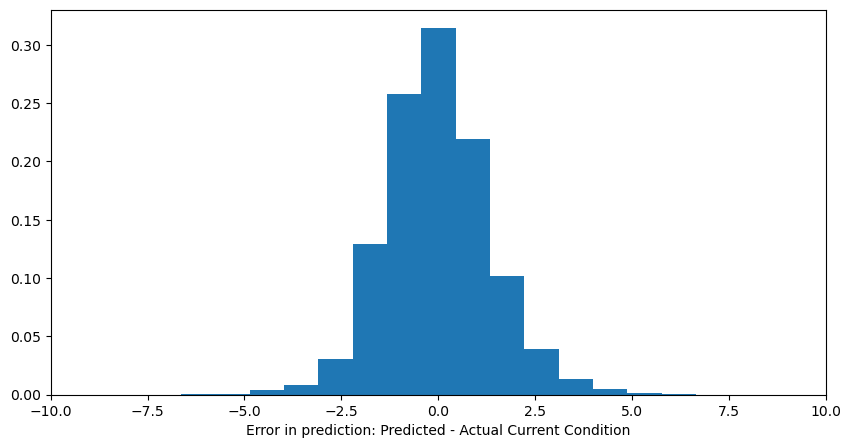

In [29]:
y_hat = reg.predict(X)

fig, a1 = plt.subplots(1, 1, figsize=(10, 5))
residuals = y_hat - y
a1.hist(residuals, bins=30, density=True)
a1.set_xlabel('Error in prediction: Predicted - Actual Current Condition')
a1.set_xlim(-10, 10)  

plt.show()

An error value of 0 occurs with a frequency of 25%, indicating that 25% of the predicted data perfectly matches the actual current condition data with no errors. In general, it's evident that the majority of errors fall within a relatively narrow range of approximately -1.5 to 1.5.

Text(0, 0.5, 'Actual Value')

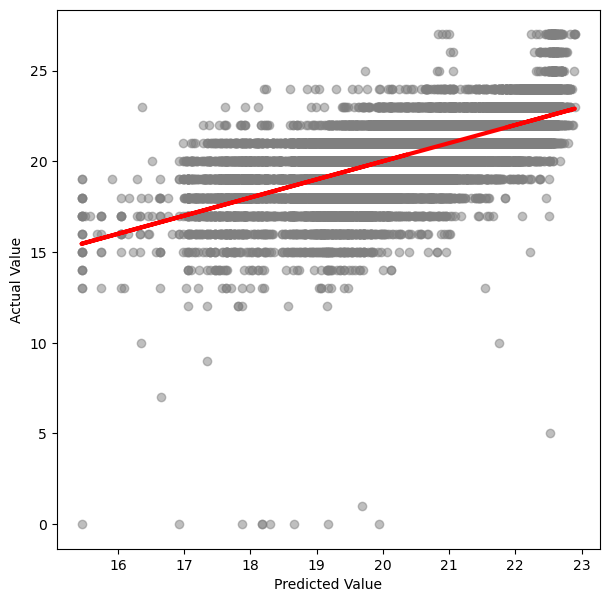

In [30]:
# Plot the outputs with custom colors
fig, a = plt.subplots(1, 1, figsize=(7, 7))
a.scatter(y_hat, y, color='grey', alpha=0.5)   
a.plot(y_hat, y_hat, color='red', linewidth=3)  

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')


Visually, we can observe the predicted values plotted against the actual values. When the points closely align with the red line, it indicates a better fit, suggesting that the model's predictions closely match the actual values.

#### 4.4 Comparing the regression coefficients of continuous variables

Variables that are more influence on current condition of bridge will be examined based on regression coefficients.

In [31]:
#beta values
beta_AvgD, beta_Age, beta_Trucks, beta_Beam, beta_Slab, beta_Steel, beta_Others, beta_Timber = reg.coef_

In [32]:
print('Regression coefficient for AverageDaily is %4.3f' % beta_AvgD )
print('Regression coefficient for Age is %4.3f' % beta_Age)
print('Regression coefficient for Trucks percent is %4.3f' % beta_Trucks)

Regression coefficient for AverageDaily is -0.000
Regression coefficient for Age is -0.059
Regression coefficient for Trucks percent is 0.009


These coefficient values represent the mean change in the response given a one-unit change in the predictor. For example, The current condition score decreases by -0.059 for every year. We can see there is no change in Average Daily variable, and there is small changes in Trucks percent.

In [35]:
#Calculating ranges
AvgD_uses_R = bridges.AverageDaily.quantile(0.9) - bridges.AverageDaily.quantile(0.1)
Trucks_percent_R = bridges.Trucks_percent.quantile(0.9) - bridges.Trucks_percent.quantile(0.1)
Age_R = bridges.Age.quantile(0.9) - bridges.Age.quantile(0.1)
Current_cond_range = bridges.Current_condition.quantile(0.9) - bridges.Current_condition.quantile(0.1)

print('Range of average daily uses is:', AvgD_uses_R )
print('Range of Trucks percent is:', Trucks_percent_R, '%')
print('Range of Age  is:', Age_R, 'years')
print('Range of target values is :' , Current_cond_range)

Range of average daily uses is: 17265.0
Range of Trucks percent is: 20.0 %
Range of Age  is: 52.0 years
Range of target values is : 5.0


In [37]:
print ('The change in Current condition score  given by the Average uses coefficient (over its range) is %4.1f percent'
       % (100 * (beta_AvgD * AvgD_uses_R) / Current_cond_range))

print ('The change in Current condition score  given by the Trucks percent coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Trucks * Trucks_percent_R) / Current_cond_range))

print ('The change in Current condition score  given by the Age coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Age * Age_R) / Current_cond_range))

The change in Current condition score  given by the Average uses coefficient (over its range) is -0.8 percent
The change in Current condition score  given by the Trucks percent coefficient (over its range) is  3.6 percent
The change in Current condition score  given by the Age coefficient (over its range) is -61.4 percent


we can see Age has the most influence on current condition of bridge while Average Daily is only -0.8 percent change and Trucks percent is +3.6 percent change.
Thus, Age has more influence on current condition score as expected in Exploratory analysis.

#### 4.5 Comparing the regression coefficients of categorical variables

In [38]:
print('Comparing to Others designed bridges, regression coefficient for Beam design is %4.3f' % beta_Beam)
print('Comparing to Others designed bridges, regression coefficient for Slab design is %4.3f' % beta_Slab)
print('Comparing to Concrete bridges, regression coefficient for Steel material is %4.3f' % beta_Steel)
print('Comparing to Concrete bridges, regression coefficient for Others material is %4.3f' % beta_Others)
print('Comparing to Concrete bridges, regression coefficient for Timber material is %4.3f' % beta_Timber)

Comparing to Others designed bridges, regression coefficient for Beam design is 0.021
Comparing to Others designed bridges, regression coefficient for Slab design is 0.047
Comparing to Concrete bridges, regression coefficient for Steel material is -1.565
Comparing to Concrete bridges, regression coefficient for Others material is -0.243
Comparing to Concrete bridges, regression coefficient for Timber material is -3.163


In design variable, slab designed bridges have more effect +0.047 in change of current condition score comparing to beam designed bridges. In material variable, Timber bridges have more effect -3.163 in change of current condition score comparing to Others and Steel bridges. slab designed bridges and Timber bridges had more influence on current condition of bridges.

#### Conclusion

As anticipated during our exploratory analysis, the proposed variables do not provide strong predictive power for the current condition of bridges. The R-squared coefficient was only 0.47, suggesting that the independent variables account for only 47.1% of the variation in the target variable. Among the predictor variables, 'Age' exerts the most significant influence on the target value, with a change in the current condition score given by the Age coefficient (across its range) amounting to -61.4%, the highest compared to other variables. Additionally, within the material and design variables, 'Timber' and 'Slab' have a more pronounced impact on the current condition of bridges.